In [34]:
#librerias
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import seaborn as sn
from scipy import signal
from scipy.fft import fft, fftfreq, fftshift
from scipy.signal import stft, istft

sn.set_style('darkgrid')
np.random.seed(27)


## **Perturbation Theory Signal**

In [35]:
# Parameters for the simulation
height = 0.2
frequency =  10 #Hz
duration = 10.0 #seconds
num_points =  5000 #number of points in time
time_points = np.linspace(0,duration,num_points)

# 1D Faraday wave 
omega =  2 * np.pi * frequency
k = omega**2

amplitude =  0.05 #small perturbation
surface =  height * np.cos(k*time_points) + amplitude*np.sin(2*k*time_points)

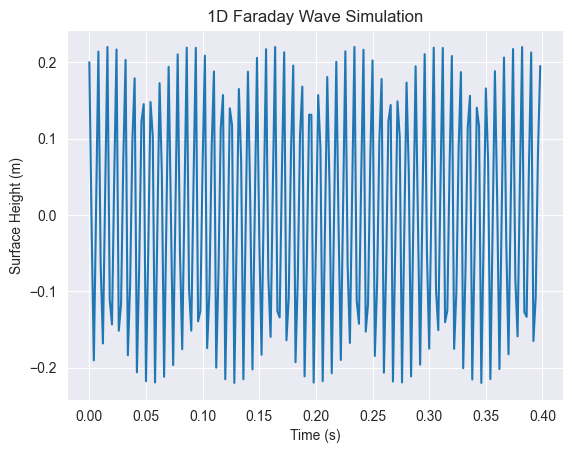

In [36]:
# plot the wave

plt.plot(time_points[:200], surface[:200])
plt.xlabel('Time (s)')
plt.ylabel('Surface Height (m)')
plt.title('1D Faraday Wave Simulation')
plt.show()

### **Noise**

In [37]:
noise = np.random.normal(0,1,time_points.size)
rms = math.sqrt(np.mean(surface**2))
rms_noise = math.sqrt(np.mean(noise**2))
snr = 10*np.log(rms**2/rms_noise**2)

In [38]:
print('RMS:\t',rms)
print('RMS Noise:\t',rms_noise)
print('SNR:\t',snr)

RMS:	 0.14577663498889787
RMS Noise:	 0.9926452499285034
SNR:	 -38.3659559300901


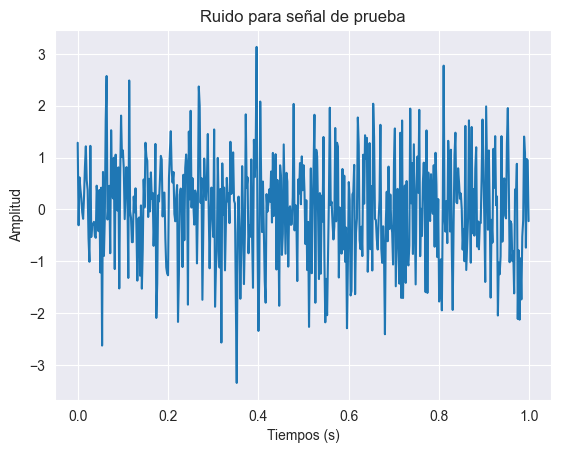

In [39]:
plt.plot(time_points[:500],noise[:500])
plt.xlabel('Tiempos (s)')
plt.ylabel('Amplitud')
plt.title('Ruido para señal de prueba')
plt.show()

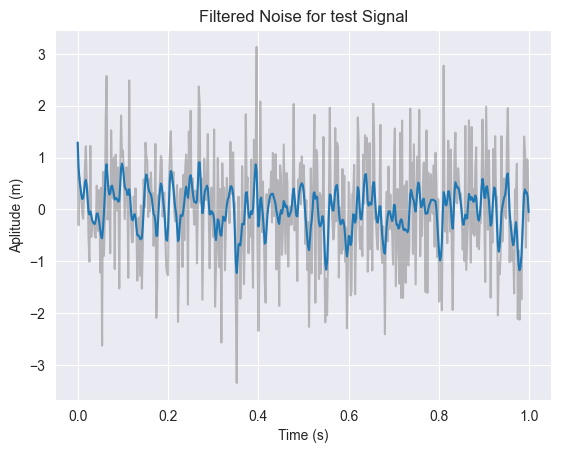

In [40]:
# Filtro pasa bajo

b,a = signal.butter(1,1/5, 'lowpass')
filtered =  signal.filtfilt(b,a, noise)

plt.plot(time_points[:500],noise[:500],alpha=0.5,color='grey')
plt.plot(time_points[:500], filtered[:500])
plt.xlabel('Time (s)')
plt.ylabel('Aplitude (m)')
plt.title('Filtered Noise for test Signal')
plt.show()

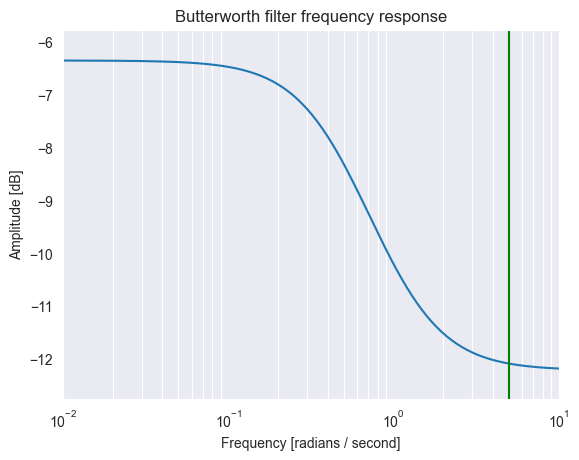

In [41]:
w, h = signal.freqs(b, a)
plt.semilogx(w, 20 * np.log10(abs(h)))
plt.title('Butterworth filter frequency response')
plt.xlabel('Frequency [radians / second]')
plt.ylabel('Amplitude [dB]')
plt.margins(0, 0.1)
plt.grid(which='both', axis='both')
plt.axvline(5, color='green') # cutoff frequency
plt.show()

In [42]:
rms = math.sqrt(np.mean(surface**2))
rms_filtered = math.sqrt(np.mean(filtered**2))
snr_filt = 10*np.log(rms**2/rms_filtered**2)

print('RMS:\t',rms)
print('RMS Noise:\t',rms_filtered)
print('SNR:\t',snr_filt)

RMS:	 0.14577663498889787
RMS Noise:	 0.39290572150910386
SNR:	 -19.829882716540613


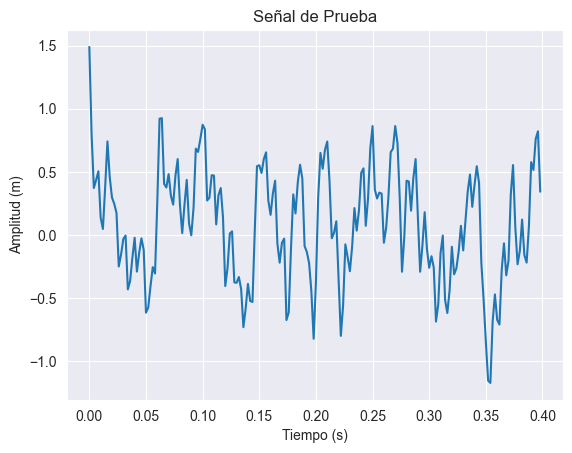

In [43]:
tester =  surface +  filtered

plt.plot(time_points[:200],tester[:200])
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud (m)')
plt.title('Señal de Prueba')
plt.show()

## **PSD**

#### **numpy fft**

In [44]:
# PSD

#test
fft_result =  np.fft.fft(tester)
freqs_test =  np.fft.fftfreq(len(tester), time_points[1]-time_points[0])
psd_test =  np.abs(fft_result)**2

#signal
fft_result =  np.fft.fft(surface)
freqs_signal =  np.fft.fftfreq(len(surface), time_points[1]-time_points[0])
psd_signal =  np.abs(fft_result)**2

#noise
fft_result =  np.fft.fft(filtered)
freqs_noise =  np.fft.fftfreq(len(filtered), time_points[1]-time_points[0])
psd_noise =  np.abs(fft_result)**2



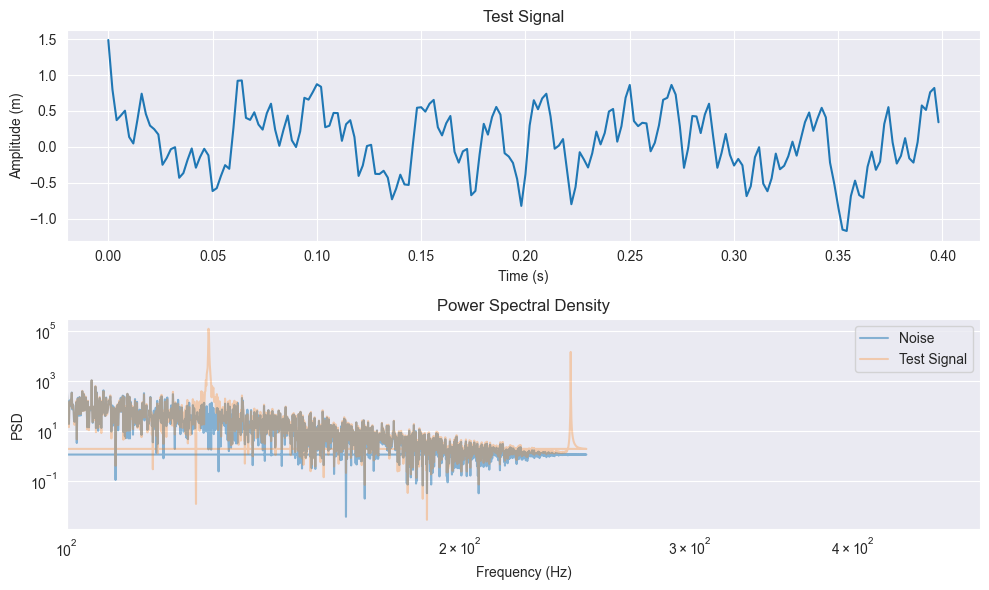

In [55]:
plt.figure(figsize=(10,6))
plt.subplot(2,1,1)
plt.plot(time_points[:200],tester[:200])
plt.xlabel('Time (s)')
plt.ylabel('Amplitude (m)')
plt.title('Test Signal')

plt.subplot(2,1,2)
plt.loglog(freqs_noise, psd_noise,label='Noise', alpha = 0.5)#, color='black')
#plt.loglog(freqs_signal, psd_signal,label='Signal', alpha = 0.5)
plt.loglog(freqs_test, psd_test,label='Test Signal', alpha = 0.3)
plt.xlabel('Frequency (Hz)')
plt.ylabel('PSD')
plt.title('Power Spectral Density')
plt.legend()
plt.xlim(100,500)

plt.tight_layout()
plt.show()

In [ ]:
# Uso de scipy para periodogram

(f, S) = scipy.signal.periodogram(tester, fs, scaling='density')

## **Ruido experimental**

In [46]:
file = 'N1000mV.txt' 
noise_exp = pd.read_csv(file, sep='\t', header=None)
noise_exp.drop([0], axis=1, inplace=True)
noise_exp.columns = ['un1', 'un2']
noise_exp.head()

,un1,un2
0,0.000224,-0.500555
1,0.000063,-0.503776
2,0.000224,-0.505064
3,0.000063,-0.507479
4,-0.000098,-0.511505
